# Sensitivity Analysis

In [51]:
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.test_functions import Ishigami
import numpy as np

problem = {
    'num_vars': 6,
    'names': ['c1', 'c2', 'c3', 'c4', 'c5', 'c6'],
    'bounds': [[0, 0.021],
               [0, 0.7951199200000003],
               [0, 2.3385880000000006],
               [0, 6.878200000000002],
               [0, 60.0],
               [0, 262.5]]
               
}

param_values = saltelli.sample(problem, 2000)

In [54]:
'''
For each strain values collect predictions
'''
YY = []
for st in range(len(strain_fe_media)):  
    Y = np.zeros([param_values.shape[0]])
    for i, par in enumerate(param_values):
        P = np.insert(par,0,strain_fe_media[st])
        Y[i] = model.predict(np.array([P]))[0]
    YY.append(Y)

    

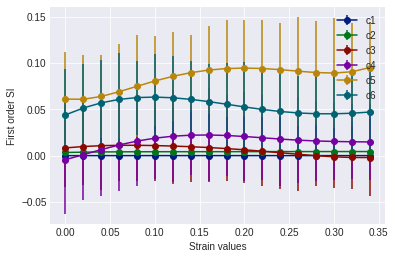

In [74]:
# example data
x = strain_fe_media
#plt.figure(figsize=(8,5))
for j in range(6):
    y = np.array([sobol.analyze(problem, YY[i])['S1'][j] for i in range(18) ])
    error = np.array([sobol.analyze(problem, YY[i])['S1_conf'][j] for i in range(18) ])
    plt.errorbar(x, y, yerr=error, fmt='-o', label = "c%s"%(j+1))
plt.legend()
plt.xlabel("Strain values")
plt.ylabel("First order SI")
#plt.title("First order Sobol sensitivity indices")
ax.grid()
plt.show()


In [74]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 13})

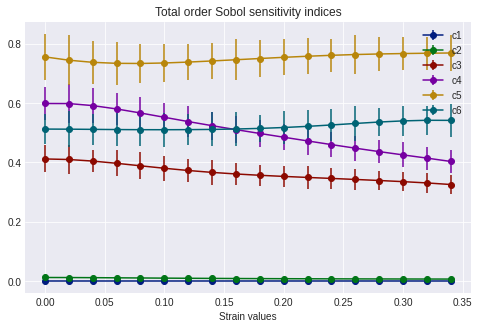

In [60]:
# example data

plt.figure(figsize=(8,5))
for j in range(6):
    y = np.array([sobol.analyze(problem, YY[i])['ST'][j] for i in range(18) ])
    error = np.array([sobol.analyze(problem, YY[i])['ST_conf'][j] for i in range(18) ])
    plt.errorbar(x, y, yerr=error, fmt='-o', label = "c%s"%(j+1))
plt.legend()
plt.xlabel("Strain values")
plt.title("Total order Sobol sensitivity indices")
ax.grid()
plt.show()
